In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [4]:
df = pd.read_csv("/content/application_train (1).csv")

In [5]:
df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0.0,202500.0,406597.5,24700.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0.0,270000.0,1293502.5,35698.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0.0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0.0,135000.0,312682.5,29686.5,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0.0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54332,162944,0,Cash loans,F,N,Y,1.0,202500.0,1125000.0,33025.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
54333,162945,0,Cash loans,F,N,Y,0.0,90000.0,651600.0,21663.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,4.0
54334,162946,0,Cash loans,F,N,N,0.0,175500.0,922500.0,39213.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
54335,162947,0,Cash loans,F,N,N,0.0,180000.0,497520.0,25758.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Total number of loan applications: 54,337


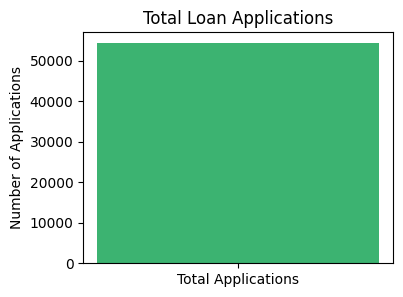

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
total_applications = df['SK_ID_CURR'].nunique()
print(f"Total number of loan applications: {total_applications:,}")
plt.figure(figsize=(4, 3))
plt.bar(['Total Applications'], [total_applications], color='mediumseagreen')
plt.title('Total Loan Applications')
plt.ylabel('Number of Applications')
plt.show()

Overall Default Rate: 8.07%


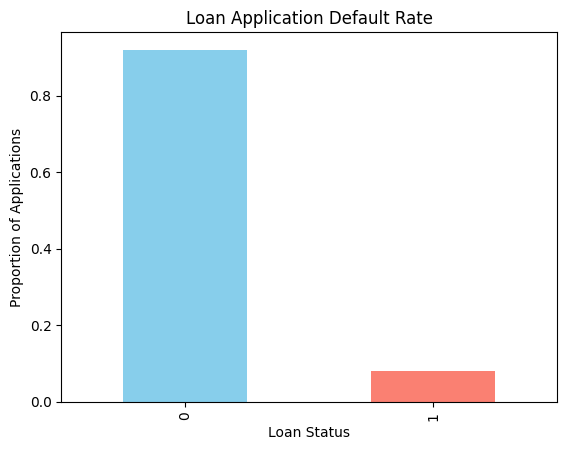

In [7]:
import pandas as pd
import matplotlib.pyplot as plt


default_rate = df['TARGET'].mean()
print(f"Overall Default Rate: {default_rate:.2%}")
df['TARGET'].value_counts(normalize=True).plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Loan Application Default Rate')
plt.ylabel('Proportion of Applications')
plt.xlabel('Loan Status')
plt.show()

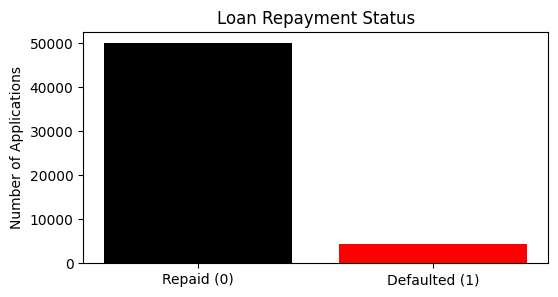

In [8]:
import pandas as pd
import matplotlib.pyplot as plt


target_counts = df['TARGET'].value_counts().sort_index()
target_labels = ['Repaid (0)', 'Defaulted (1)']
plt.figure(figsize=(6, 3))
plt.bar(target_labels, target_counts, color=['black', 'red'])
plt.title('Loan Repayment Status')
plt.ylabel('Number of Applications')
plt.show()

Loan Type Distribution:
NAME_CONTRACT_TYPE
Cash loans         49182
Revolving loans     5155
Name: count, dtype: int64


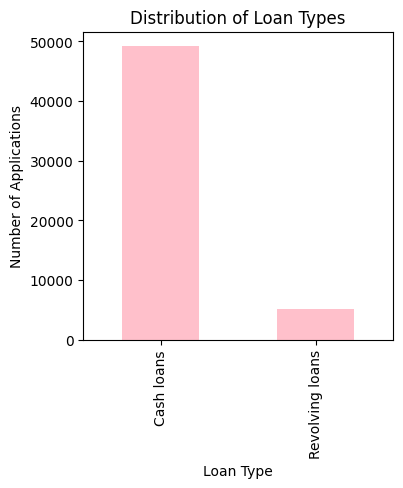

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

contract_counts = df['NAME_CONTRACT_TYPE'].value_counts()
print("Loan Type Distribution:")
print(contract_counts)
plt.figure(figsize=(4, 4))
contract_counts.plot(kind='bar', color='pink')
plt.title('Distribution of Loan Types')
plt.ylabel('Number of Applications')
plt.xlabel('Loan Type')
plt.show()

Default Rates by Loan Type (%):
NAME_CONTRACT_TYPE
Revolving loans    5.08
Cash loans         8.38
Name: TARGET, dtype: float64


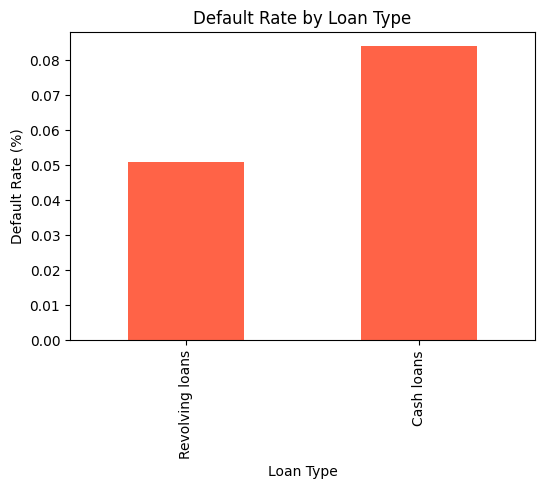

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

default_rates = df.groupby('NAME_CONTRACT_TYPE')['TARGET'].mean().sort_values()
print("Default Rates by Loan Type (%):")
print((default_rates * 100).round(2))
plt.figure(figsize=(6, 4))
default_rates.plot(kind='bar', color='tomato')
plt.title('Default Rate by Loan Type')
plt.ylabel('Default Rate (%)')
plt.xlabel('Loan Type')
plt.show()

Applicant Distribution by Gender:
CODE_GENDER
F      35690
M      18644
XNA        2
Name: count, dtype: int64


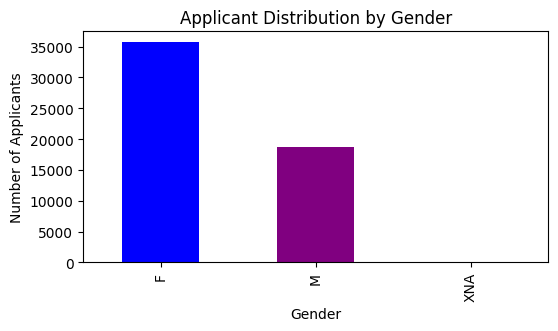

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

gender_counts = df['CODE_GENDER'].value_counts()
print("Applicant Distribution by Gender:")
print(gender_counts)
plt.figure(figsize=(6, 3))
gender_counts.plot(kind='bar', color=['blue', 'purple', 'black'])
plt.title('Applicant Distribution by Gender')
plt.ylabel('Number of Applicants')
plt.xlabel('Gender')
plt.show()

Default Rates by Gender (%):
CODE_GENDER
M      10.23
F       6.94
XNA     0.00
Name: TARGET, dtype: float64


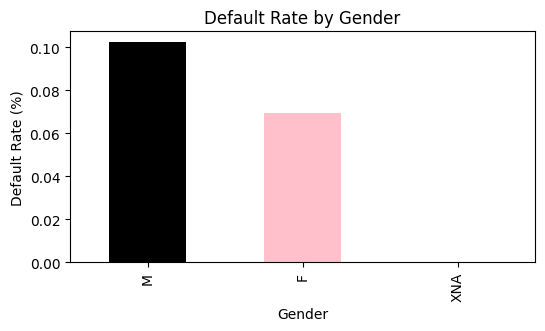

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

gender_default_rates = df.groupby('CODE_GENDER')['TARGET'].mean().sort_values(ascending=False)
print("Default Rates by Gender (%):")
print((gender_default_rates * 100).round(2))
plt.figure(figsize=(6,3))
gender_default_rates.plot(kind='bar', color=['black', 'pink', 'gray'])
plt.title('Default Rate by Gender')
plt.ylabel('Default Rate (%)')
plt.xlabel('Gender')
plt.show()

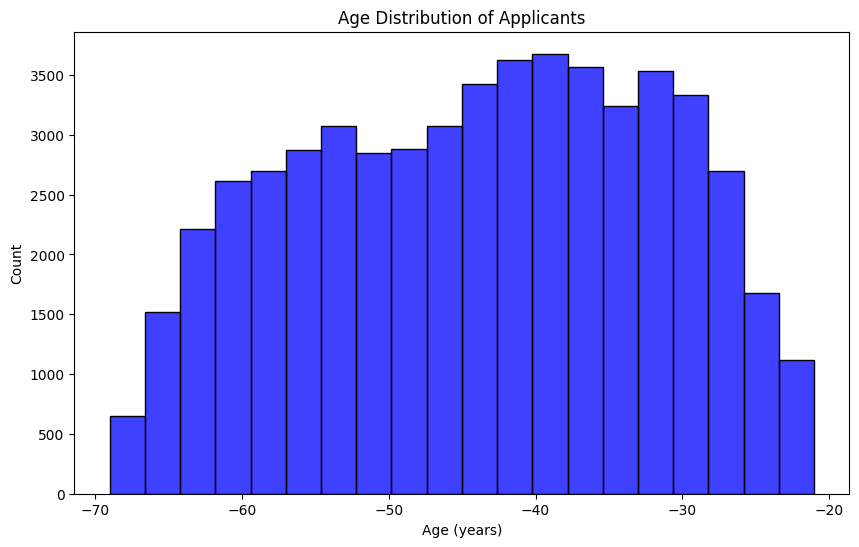

In [13]:
import seaborn as sns

df['AGE_YEARS'] = df['DAYS_BIRTH'] / 365


plt.figure(figsize=(10,6))
sns.histplot(df['AGE_YEARS'], bins=20, color='blue')
plt.title("Age Distribution of Applicants")
plt.xlabel("Age (years)")
plt.ylabel("Count")
plt.show()

Default Rate by Age Group (%):
AGE_GROUP
[20, 30)   NaN
[30, 40)   NaN
[40, 50)   NaN
[50, 60)   NaN
[60, 70)   NaN
Name: TARGET, dtype: float64


/tmp/ipython-input-14-545448110.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_default_rates = df.groupby('AGE_GROUP')['TARGET'].mean() * 100


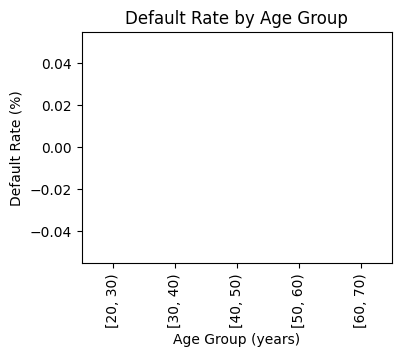

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

df['AGE_YEARS'] = df['DAYS_BIRTH'] / 365

age_bins = [20, 30, 40, 50, 60, 70]
df['AGE_GROUP'] = pd.cut(df['AGE_YEARS'], bins=age_bins, right=False)


age_default_rates = df.groupby('AGE_GROUP')['TARGET'].mean() * 100


print("Default Rate by Age Group (%):")
print(age_default_rates.round())
plt.figure(figsize=(4, 3))
age_default_rates.plot(kind='bar', color='teal')
plt.title('Default Rate by Age Group')
plt.xlabel('Age Group (years)')
plt.ylabel('Default Rate (%)')
plt.show()

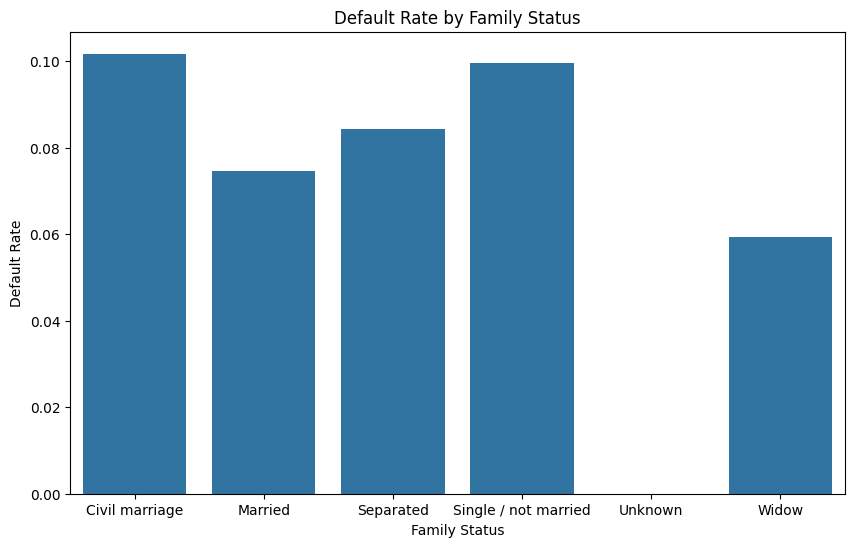

In [15]:
import seaborn as sns

default_rate_df = df.groupby('NAME_FAMILY_STATUS')['TARGET'].mean().reset_index()

plt.figure(figsize=(10,6))
sns.barplot(data=default_rate_df, x='NAME_FAMILY_STATUS', y='TARGET')
plt.title("Default Rate by Family Status")
plt.ylabel("Default Rate")
plt.xlabel("Family Status")
plt.show()

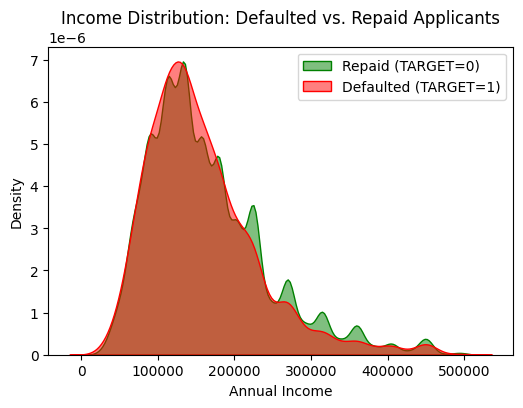

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df_filtered = df[df['AMT_INCOME_TOTAL'] < 500000]

plt.figure(figsize=(6,4))
sns.kdeplot(data=df_filtered[df_filtered['TARGET'] == 0]['AMT_INCOME_TOTAL'],
            label='Repaid (TARGET=0)', color='green', fill=True, alpha=0.5)
sns.kdeplot(data=df_filtered[df_filtered['TARGET'] == 1]['AMT_INCOME_TOTAL'],
            label='Defaulted (TARGET=1)', color='red', fill=True, alpha=0.5)

plt.title('Income Distribution: Defaulted vs. Repaid Applicants')
plt.xlabel('Annual Income')
plt.ylabel('Density')
plt.legend()
plt.show()

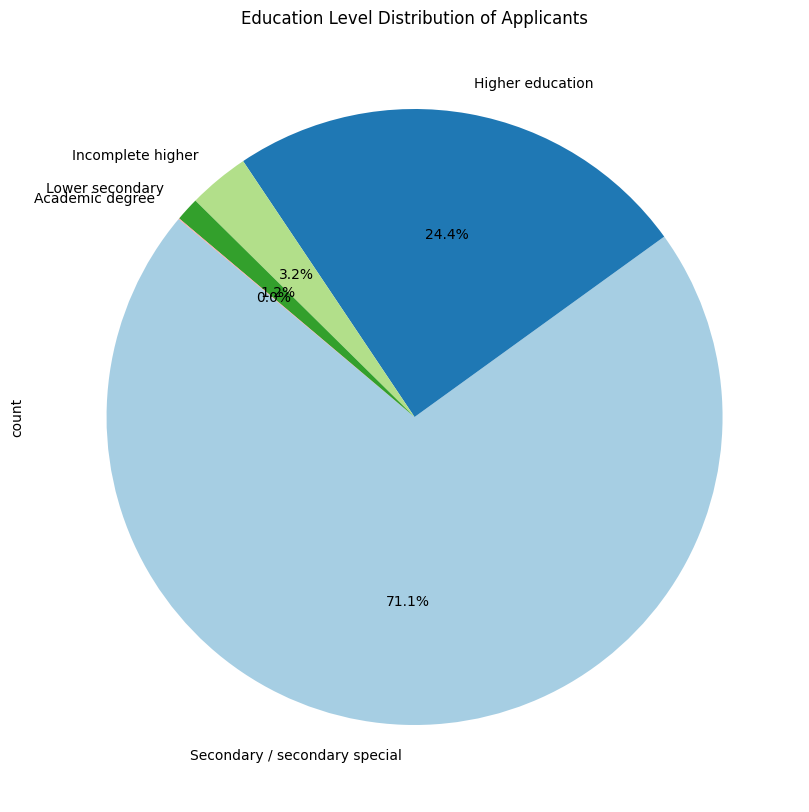

In [17]:
plt.figure(figsize=(10,10))
education_counts = df['NAME_EDUCATION_TYPE'].value_counts()
education_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title("Education Level Distribution of Applicants")
plt.show()

Default Rate by Education Level (%):
NAME_EDUCATION_TYPE
Academic degree                  0.04
Higher education                 0.05
Incomplete higher                0.08
Secondary / secondary special    0.09
Lower secondary                  0.12
Name: TARGET, dtype: float64


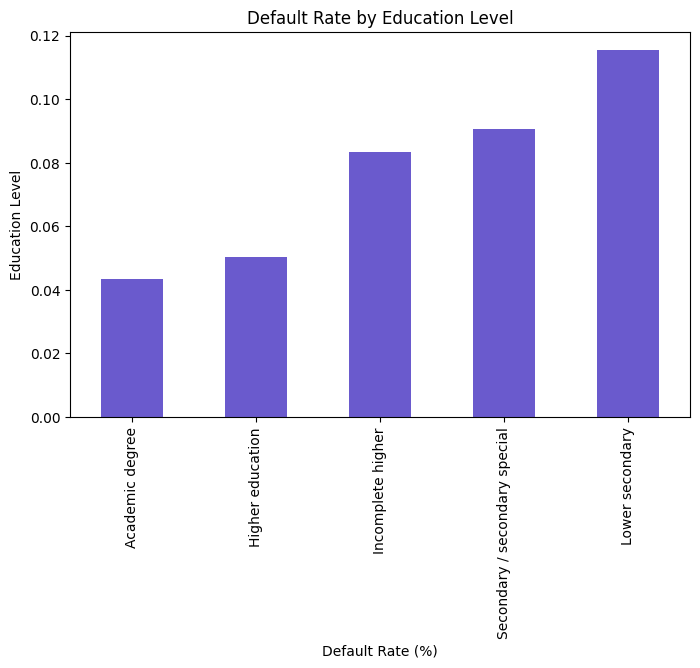

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

edu_default_rates = df.groupby('NAME_EDUCATION_TYPE')['TARGET'].mean().sort_values()

print("Default Rate by Education Level (%):")
print(edu_default_rates.round(2))

plt.figure(figsize=(8, 5))
edu_default_rates.plot(kind='bar', color='slateblue')
plt.title('Default Rate by Education Level')
plt.xlabel('Default Rate (%)')
plt.ylabel('Education Level')

plt.show()

/tmp/ipython-input-19-3799056090.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='HAS_CHILDREN', y='TARGET', estimator='mean', palette=['lightblue', 'pink'])


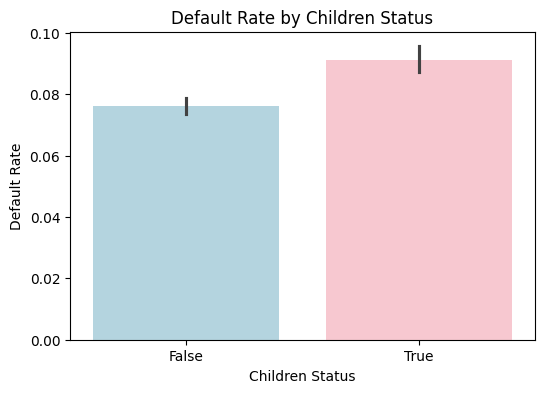

In [19]:
import seaborn as sns

df['HAS_CHILDREN'] = df['CNT_CHILDREN'] > 0


plt.figure(figsize=(6,4))
sns.barplot(data=df, x='HAS_CHILDREN', y='TARGET', estimator='mean', palette=['lightblue', 'pink'])
plt.title("Default Rate by Children Status")
plt.ylabel("Default Rate")
plt.xlabel("Children Status")
plt.show()


Default Rate by Car Ownership (%):
FLAG_OWN_CAR
Y    0.07
N    0.08
Name: TARGET, dtype: float64


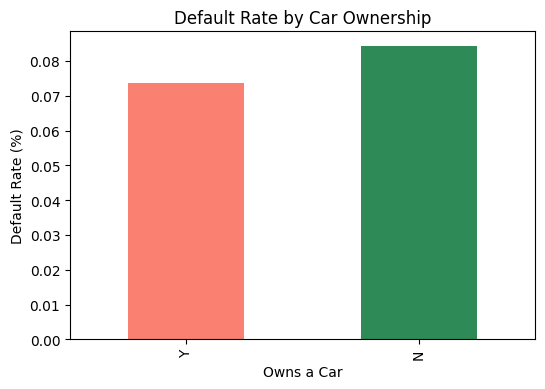

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

car_default_rate = df.groupby('FLAG_OWN_CAR')['TARGET'].mean().sort_values()

print("Default Rate by Car Ownership (%):")
print(car_default_rate.round(2))

plt.figure(figsize=(6, 4))
car_default_rate.plot(kind='bar', color=['salmon', 'seagreen'])
plt.title('Default Rate by Car Ownership')
plt.xlabel('Owns a Car')
plt.ylabel('Default Rate (%)')
plt.show()

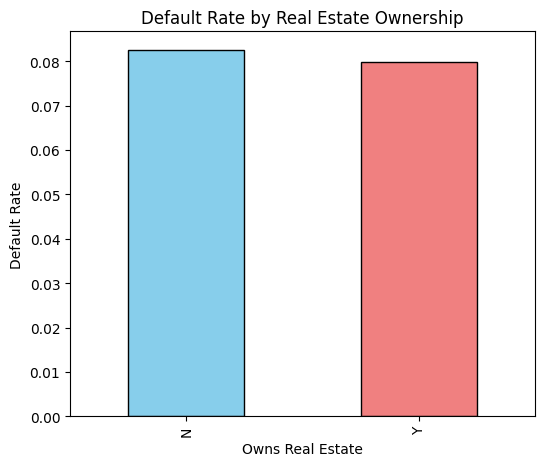

In [21]:
import pandas as pd
import matplotlib.pyplot as plt


default_rate = df.groupby('FLAG_OWN_REALTY')['TARGET'].mean()
plt.figure(figsize=(6,5))
default_rate.plot(kind='bar', color=['skyblue', 'lightcoral'], edgecolor='black')
plt.title("Default Rate by Real Estate Ownership")
plt.ylabel("Default Rate")
plt.xlabel("Owns Real Estate")
plt.show()

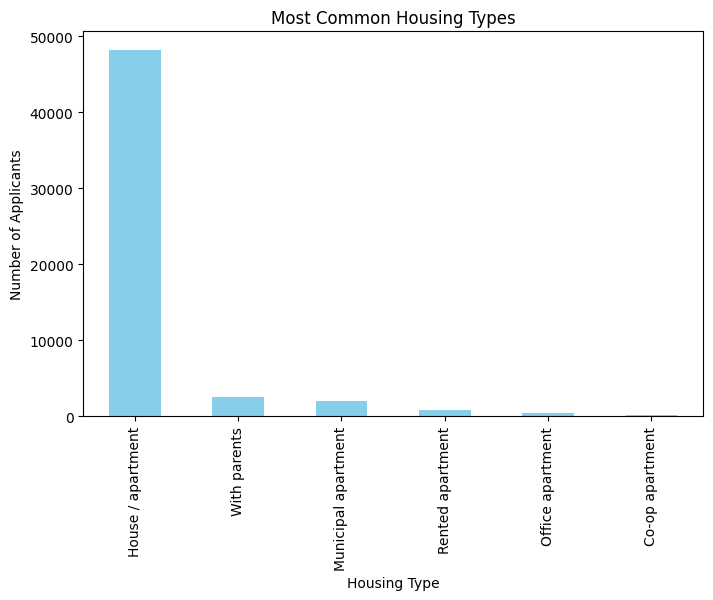

In [22]:
import matplotlib.pyplot as plt

housing_counts = df['NAME_HOUSING_TYPE'].value_counts()
plt.figure(figsize=(8, 5))
housing_counts.plot(kind='bar', color='skyblue')
plt.title('Most Common Housing Types')
plt.xlabel('Housing Type')
plt.ylabel('Number of Applicants')
plt.show()

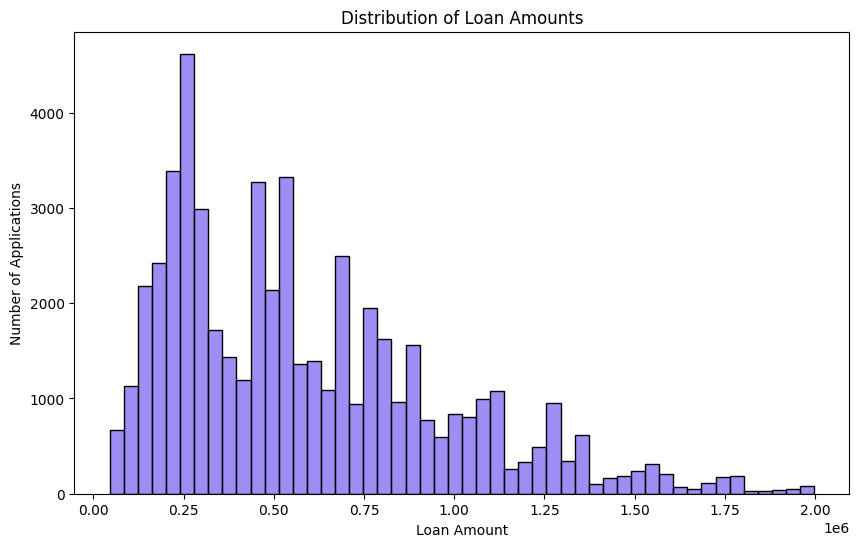

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns


df_filtered = df[df['AMT_CREDIT'] < 2_000_000]

plt.figure(figsize=(10, 6))
sns.histplot(df_filtered['AMT_CREDIT'], bins=50,  color='mediumslateblue')
plt.title('Distribution of Loan Amounts')
plt.xlabel('Loan Amount')
plt.ylabel('Number of Applications')
plt.show()

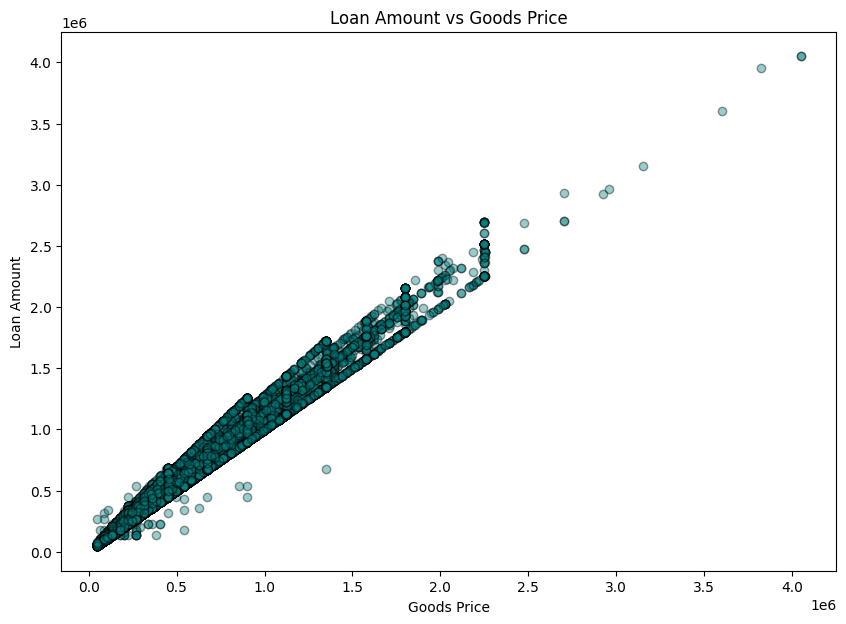

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

df_clean = df[['AMT_CREDIT', 'AMT_GOODS_PRICE']].dropna()
plt.figure(figsize=(10,7))
plt.scatter(df_clean['AMT_GOODS_PRICE'], df_clean['AMT_CREDIT'], alpha=0.4, color='teal', edgecolor='k')
plt.title("Loan Amount vs Goods Price")
plt.xlabel("Goods Price")
plt.ylabel("Loan Amount")
plt.show()

Most Common Income Types:
NAME_INCOME_TYPE
Working                 28193
Commercial associate    12595
Pensioner                9678
State servant            3856
Unemployed                  6
Student                     5
Businessman                 2
Maternity leave             1
Name: count, dtype: int64


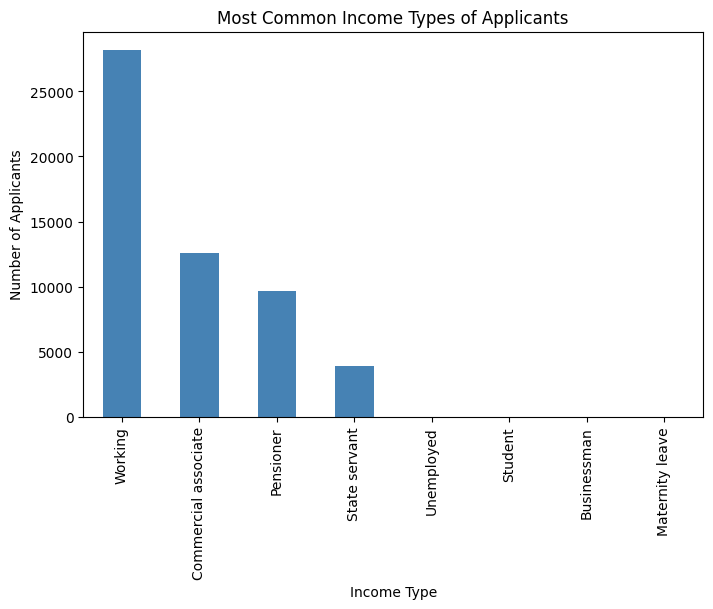

In [25]:
import matplotlib.pyplot as plt

income_type_counts = df['NAME_INCOME_TYPE'].value_counts()
print("Most Common Income Types:")
print(income_type_counts)
plt.figure(figsize=(8, 5))
income_type_counts.plot(kind='bar', color='steelblue')
plt.title('Most Common Income Types of Applicants')
plt.xlabel('Income Type')
plt.ylabel('Number of Applicants')
plt.show()

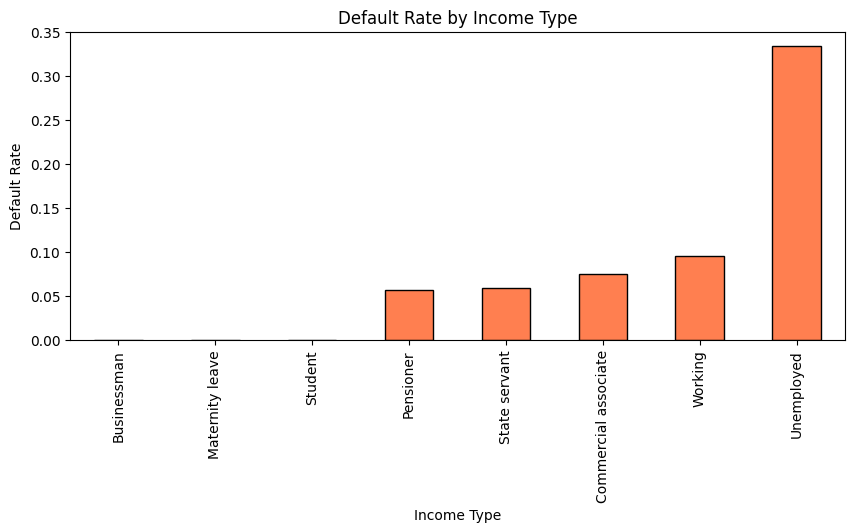

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

default_rate = df.groupby('NAME_INCOME_TYPE')['TARGET'].mean().sort_values()
plt.figure(figsize=(10,4))
default_rate.plot(kind='bar', color='coral', edgecolor='black')
plt.title("Default Rate by Income Type")
plt.xlabel("Income Type")
plt.ylabel("Default Rate")
plt.show()


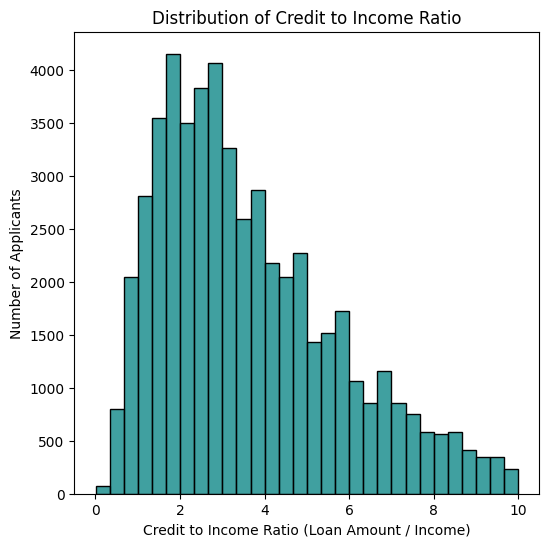

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

df['CIR'] = df['AMT_CREDIT'] / df['AMT_INCOME_TOTAL']

df_filtered = df[df['CIR'] < 10]

plt.figure(figsize=(6, 6))
sns.histplot(df_filtered['CIR'], bins=30, color='teal')
plt.title('Distribution of Credit to Income Ratio')
plt.xlabel('Credit to Income Ratio (Loan Amount / Income)')
plt.ylabel('Number of Applicants')
plt.show()

/tmp/ipython-input-28-4061756440.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ratio_default = df.groupby('RATIO_BIN')['TARGET'].mean()


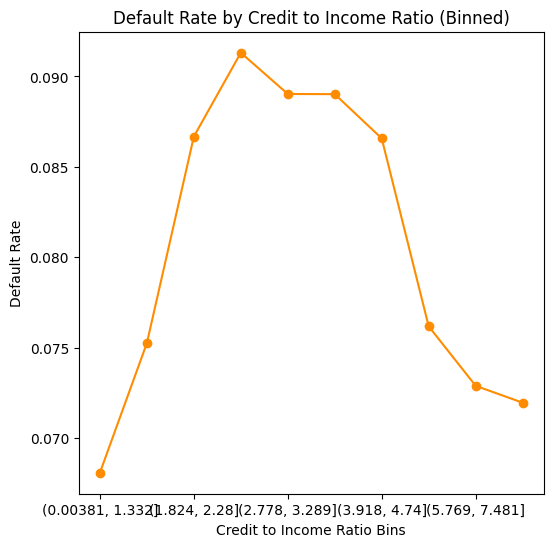

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

df['CREDIT_INCOME_RATIO'] = df['AMT_CREDIT'] / df['AMT_INCOME_TOTAL']


df['RATIO_BIN'] = pd.qcut(df['CREDIT_INCOME_RATIO'], q=10)

ratio_default = df.groupby('RATIO_BIN')['TARGET'].mean()
plt.figure(figsize=(6,6))
ratio_default.plot(kind='line', marker='o', color='darkorange')
plt.title("Default Rate by Credit to Income Ratio (Binned)")
plt.xlabel("Credit to Income Ratio Bins")
plt.ylabel("Default Rate")
plt.show()

/tmp/ipython-input-29-81327914.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['YEARS_EMPLOYED'] = -df_filtered['DAYS_EMPLOYED'] / 365


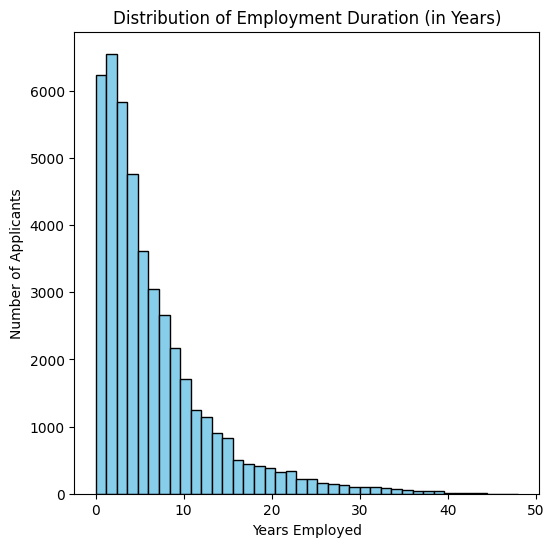

In [29]:
import pandas as pd
import matplotlib.pyplot as plt


df_filtered = df[df['DAYS_EMPLOYED'] < 365243]

df_filtered['YEARS_EMPLOYED'] = -df_filtered['DAYS_EMPLOYED'] / 365
plt.figure(figsize=(6,6))
plt.hist(df_filtered['YEARS_EMPLOYED'], bins=40, color='skyblue', edgecolor='black')
plt.title("Distribution of Employment Duration (in Years)")
plt.xlabel("Years Employed")
plt.ylabel("Number of Applicants")
plt.show()

Default Rate by Employment Duration:
EMPLOYMENT_BIN
<1 yr        10.65
1–3 yrs      11.07
3–5 yrs       9.49
5–10 yrs      7.64
10–20 yrs     5.24
20+ yrs       3.88
Name: TARGET, dtype: float64


/tmp/ipython-input-30-2413739219.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['EMPLOYMENT_BIN'] = pd.cut(df_filtered['EMPLOYMENT_YEARS'], bins=bins, labels=labels, right=False)
/tmp/ipython-input-30-2413739219.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  emp_default_rate = df_filtered.groupby('EMPLOYMENT_BIN')['TARGET'].mean() * 100


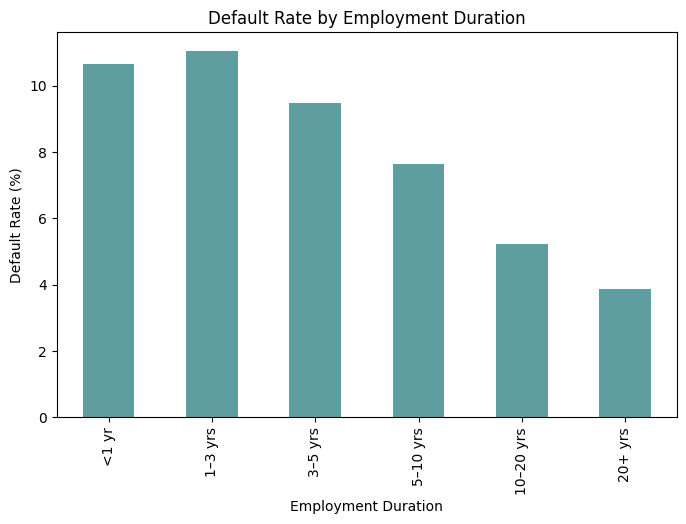

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

df['EMPLOYMENT_YEARS'] = -df['DAYS_EMPLOYED'] / 365
df_filtered = df[df['EMPLOYMENT_YEARS'] < 100]

bins = [0, 1, 3, 5, 10, 20, 50]
labels = ['<1 yr', '1–3 yrs', '3–5 yrs', '5–10 yrs', '10–20 yrs', '20+ yrs']
df_filtered['EMPLOYMENT_BIN'] = pd.cut(df_filtered['EMPLOYMENT_YEARS'], bins=bins, labels=labels, right=False)
emp_default_rate = df_filtered.groupby('EMPLOYMENT_BIN')['TARGET'].mean() * 100
print("Default Rate by Employment Duration:")
print(emp_default_rate.round(2))
plt.figure(figsize=(8, 5))
emp_default_rate.plot(kind='bar', color='cadetblue')
plt.title('Default Rate by Employment Duration')
plt.xlabel('Employment Duration')
plt.ylabel('Default Rate (%)')
plt.show()

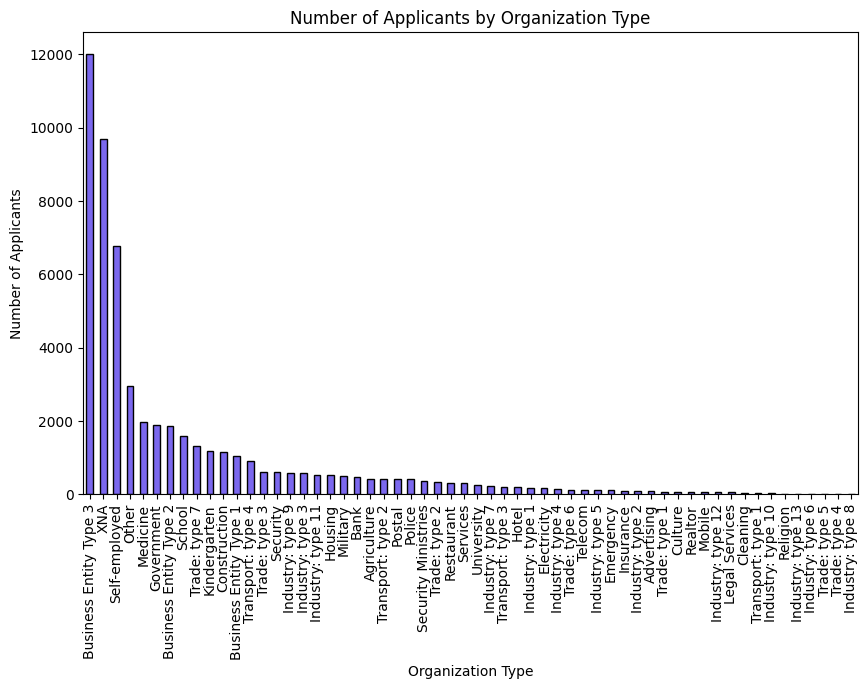

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

org_counts = df['ORGANIZATION_TYPE'].value_counts()


plt.figure(figsize=(10,6))
org_counts.plot(kind='bar', color='mediumslateblue', edgecolor='black')
plt.title("Number of Applicants by Organization Type")
plt.xlabel("Organization Type")
plt.ylabel("Number of Applicants")
plt.show()

Top 5 Organization Types by Default Rate:
ORGANIZATION_TYPE
Industry: type 8    0.00
Trade: type 4       0.00
Culture             2.99
Trade: type 6       3.39
University          4.18
Name: TARGET, dtype: float64

Lowest 5 Organization Types by Default Rate:
ORGANIZATION_TYPE
Realtor              12.12
Transport: type 3    12.75
Agriculture          12.77
Industry: type 4     12.99
Industry: type 13    31.25
Name: TARGET, dtype: float64


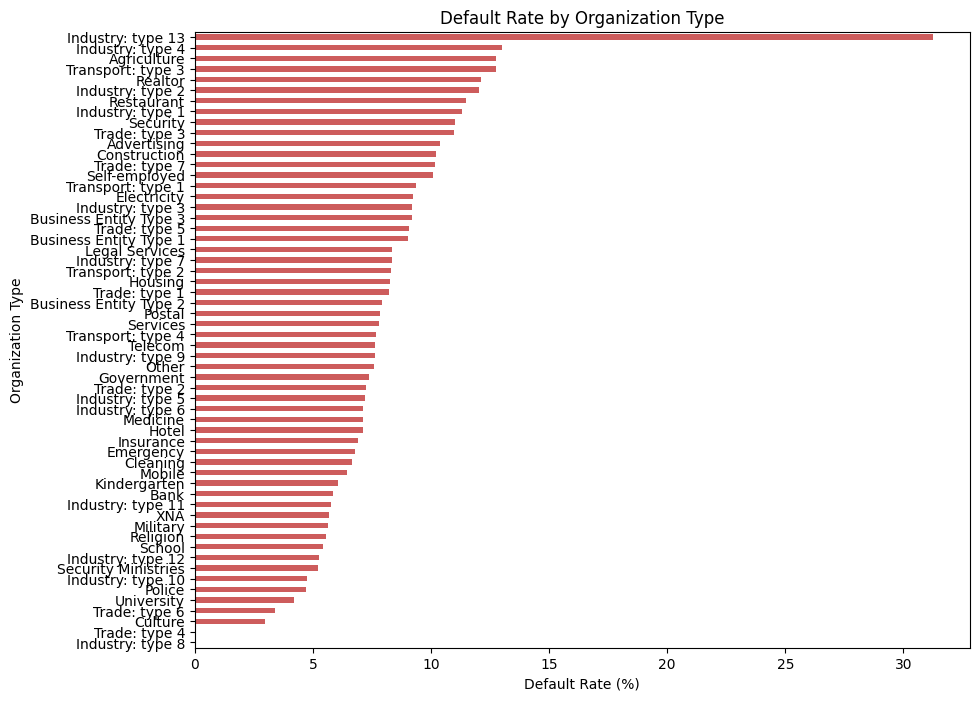

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

org_default_rates = df.groupby('ORGANIZATION_TYPE')['TARGET'].mean() * 100
org_default_rates_sorted = org_default_rates.sort_values()

print("Top 5 Organization Types by Default Rate:")
print(org_default_rates_sorted.head().round(2))
print("\nLowest 5 Organization Types by Default Rate:")
print(org_default_rates_sorted.tail().round(2))

plt.figure(figsize=(10, 8))
org_default_rates_sorted.plot(kind='barh', color='indianred')
plt.title('Default Rate by Organization Type')
plt.xlabel('Default Rate (%)')
plt.ylabel('Organization Type')
plt.show()

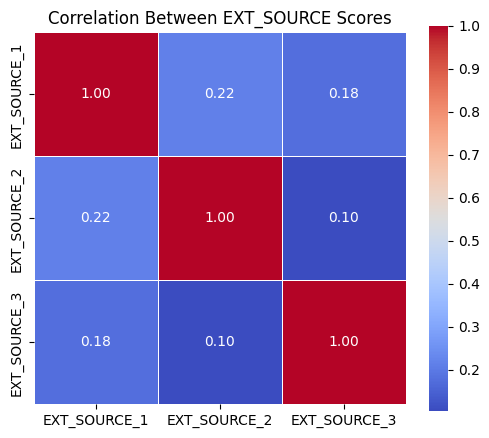

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
ext_sources = df[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']]
corr_matrix = ext_sources.corr()
plt.figure(figsize=(6, 5))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=0.5)
plt.title('Correlation Between EXT_SOURCE Scores')
plt.show()

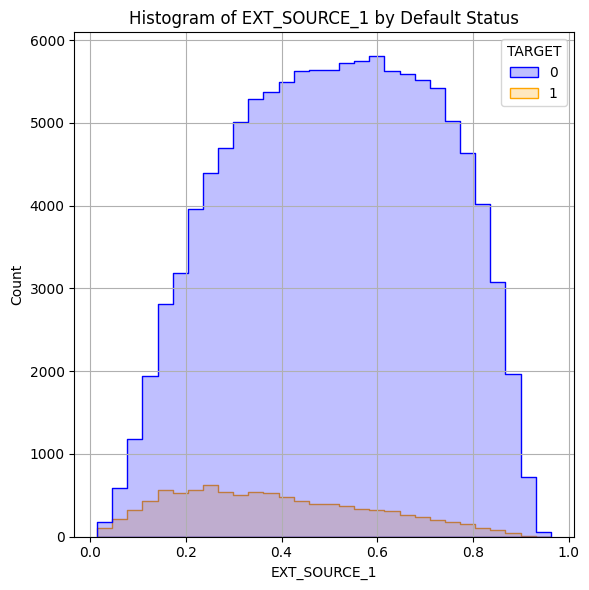

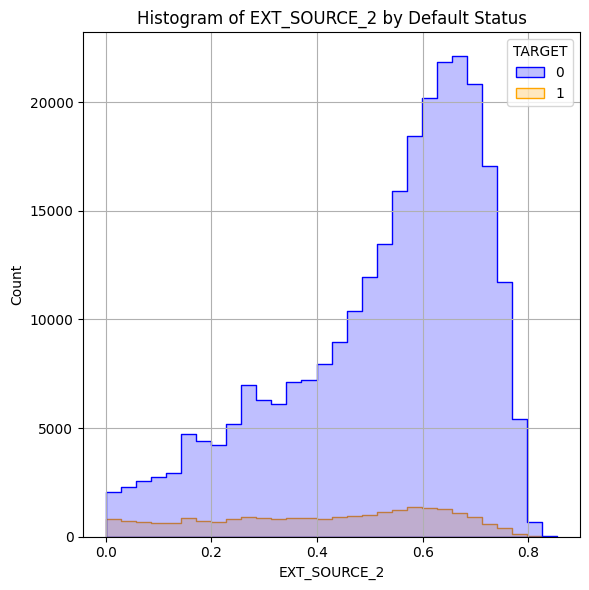

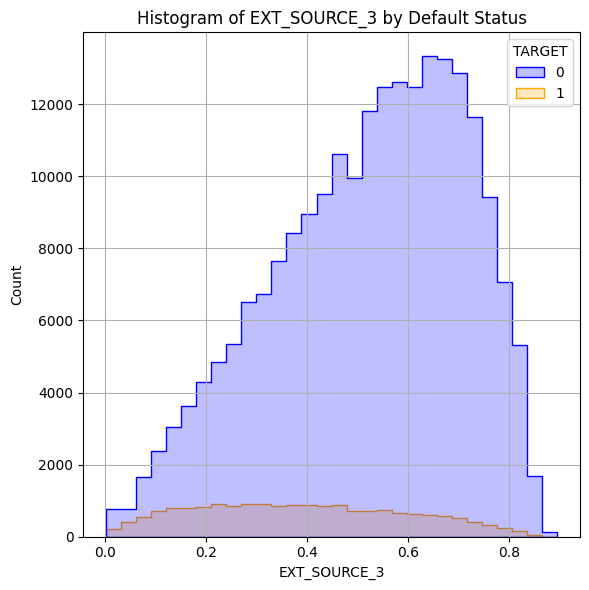

In [ ]:
for col in ['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']:
    plt.figure(figsize=(6,6))
    sns.histplot(data=df_filtered, x=col, hue='TARGET', bins=30, palette={0: 'blue', 1: 'orange'}, element='step')
    plt.title(f"Histogram of {col} by Default Status")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

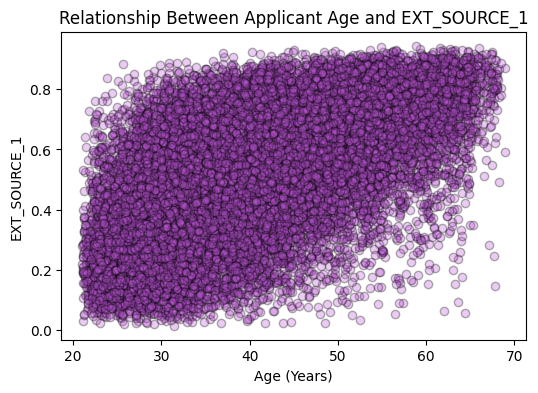

In [34]:
import pandas as pd
import matplotlib.pyplot as plt


df['AGE'] = (-df['DAYS_BIRTH']) / 365

df_filtered = df[['AGE', 'EXT_SOURCE_1']].dropna()

plt.figure(figsize=(6,4))
plt.scatter(df_filtered['AGE'], df_filtered['EXT_SOURCE_1'], alpha=0.3, color='mediumorchid', edgecolor='k')
plt.title("Relationship Between Applicant Age and EXT_SOURCE_1")
plt.xlabel("Age (Years)")
plt.ylabel("EXT_SOURCE_1")
plt.show()

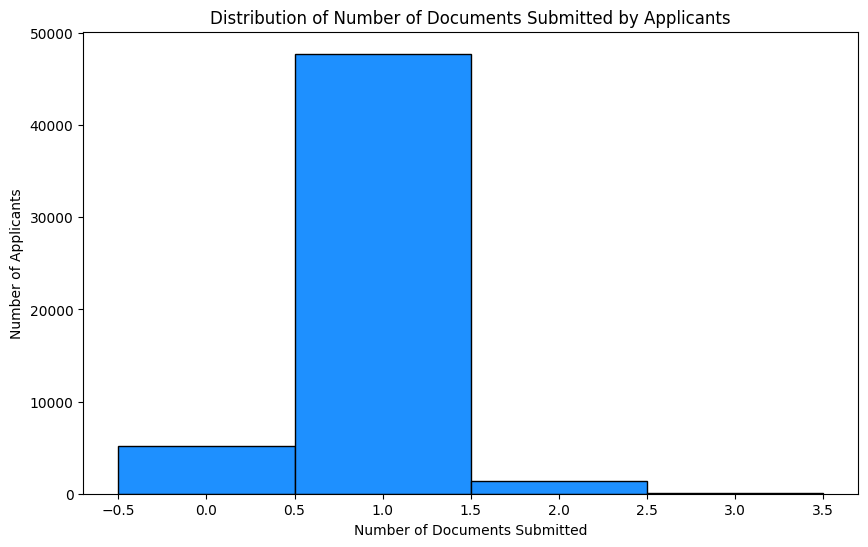

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

flag_cols = [col for col in df.columns if col.startswith('FLAG_DOCUMENT_')]

df['NUM_DOCUMENTS_SUBMITTED'] = df[flag_cols].sum(axis=1).astype(int)

plt.figure(figsize=(10,6))
plt.hist(df['NUM_DOCUMENTS_SUBMITTED'], bins=range(0, int(df['NUM_DOCUMENTS_SUBMITTED'].max())+2),
         color='dodgerblue', edgecolor='black', align='left')
plt.title("Distribution of Number of Documents Submitted by Applicants")
plt.xlabel("Number of Documents Submitted")
plt.ylabel("Number of Applicants")
plt.show()

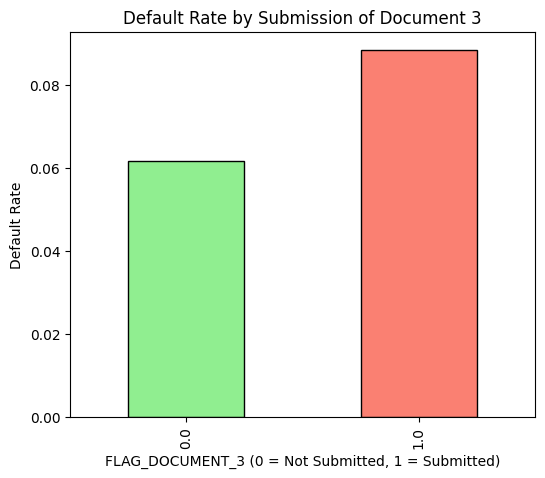

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

default_rate = df.groupby('FLAG_DOCUMENT_3')['TARGET'].mean()

plt.figure(figsize=(6,5))
default_rate.plot(kind='bar', color=['lightgreen', 'salmon'], edgecolor='black')
plt.title("Default Rate by Submission of Document 3")
plt.xlabel("FLAG_DOCUMENT_3 (0 = Not Submitted, 1 = Submitted)")
plt.ylabel("Default Rate")
plt.show()

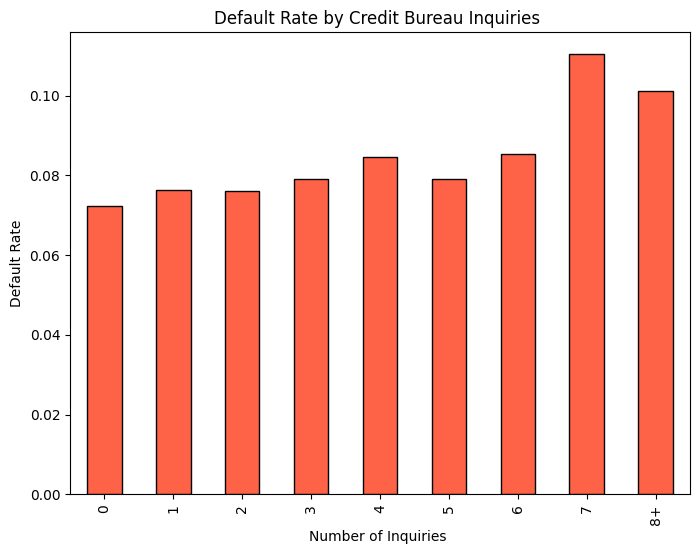

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

df_filtered = df[['AMT_REQ_CREDIT_BUREAU_YEAR', 'TARGET']].dropna()


df_filtered['INQUIRIES_BIN'] = df_filtered['AMT_REQ_CREDIT_BUREAU_YEAR'].apply(lambda x: str(int(x)) if x < 8 else '8+')

default_rate = df_filtered.groupby('INQUIRIES_BIN')['TARGET'].mean().sort_index()

plt.figure(figsize=(8,6))
default_rate.plot(kind='bar', color='tomato', edgecolor='black')
plt.title("Default Rate by Credit Bureau Inquiries ")
plt.xlabel("Number of Inquiries ")
plt.ylabel("Default Rate")
plt.show()

/tmp/ipython-input-41-4210521319.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='NAME_EDUCATION_TYPE', y='CREDIT_INCOME_RATIO', palette='Set2')


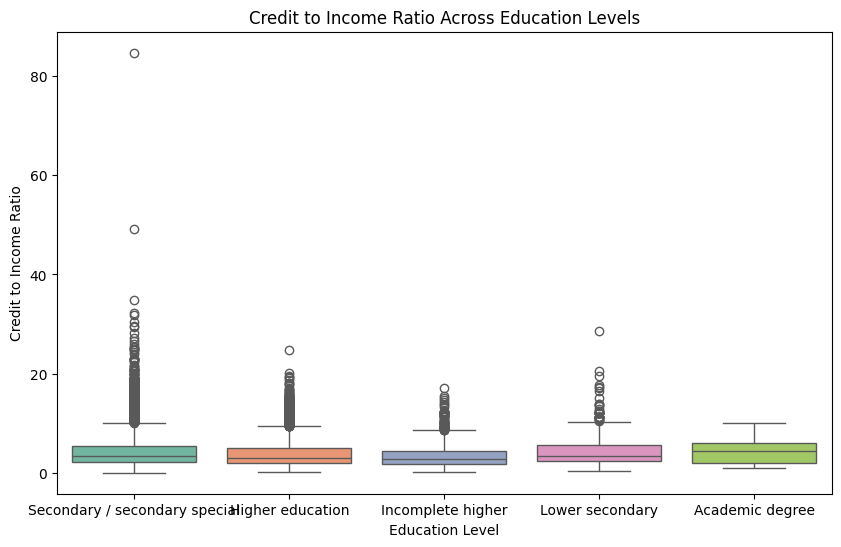

In [41]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


df['CREDIT_INCOME_RATIO'] = df['AMT_CREDIT'] / df['AMT_INCOME_TOTAL']

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='NAME_EDUCATION_TYPE', y='CREDIT_INCOME_RATIO', palette='Set2')
plt.title('Credit to Income Ratio Across Education Levels')
plt.ylabel('Credit to Income Ratio')
plt.xlabel('Education Level')
plt.show()




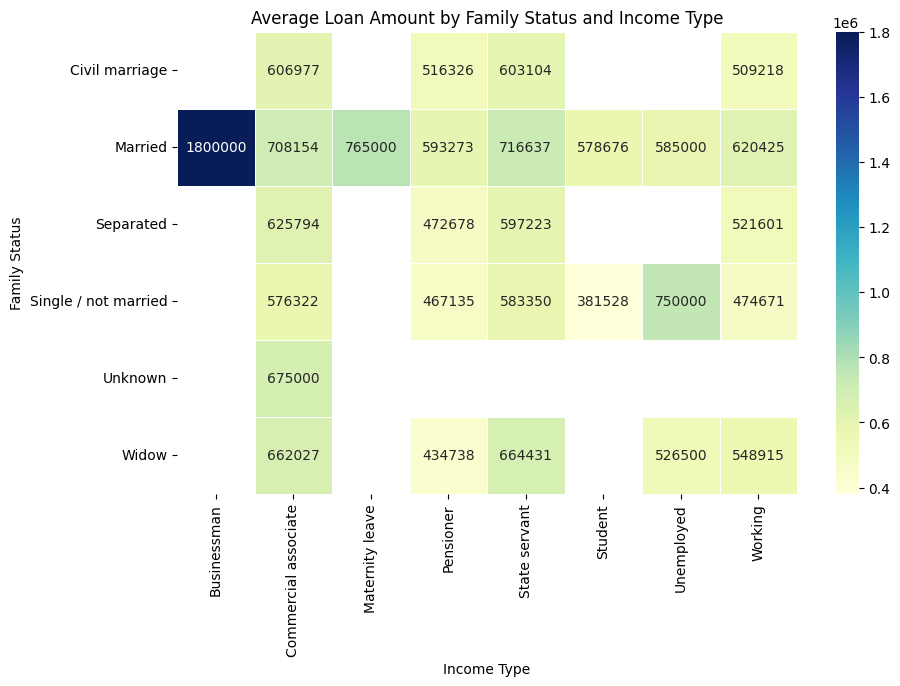

In [42]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pivot_table = df.pivot_table(
    values='AMT_CREDIT',
    index='NAME_FAMILY_STATUS',
    columns='NAME_INCOME_TYPE',
    aggfunc='mean'
)


plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, fmt=".0f", cmap="YlGnBu", linewidths=.5)
plt.title('Average Loan Amount by Family Status and Income Type')
plt.xlabel('Income Type')
plt.ylabel('Family Status')

plt.show()



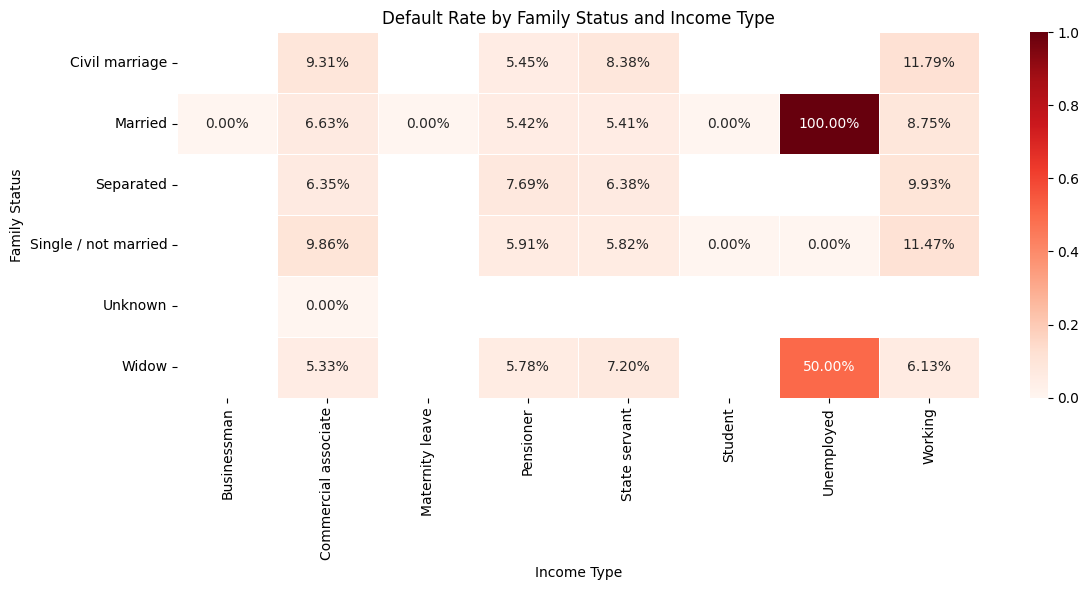

In [43]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

default_rate_pivot = df.pivot_table(
    values='TARGET',
    index='NAME_FAMILY_STATUS',
    columns='NAME_INCOME_TYPE',
    aggfunc='mean'
)

plt.figure(figsize=(12, 6))
sns.heatmap(default_rate_pivot, annot=True, fmt=".2%", cmap="Reds", linewidths=0.5)
plt.title('Default Rate by Family Status and Income Type')
plt.xlabel('Income Type')
plt.ylabel('Family Status')
plt.tight_layout()
plt.show()



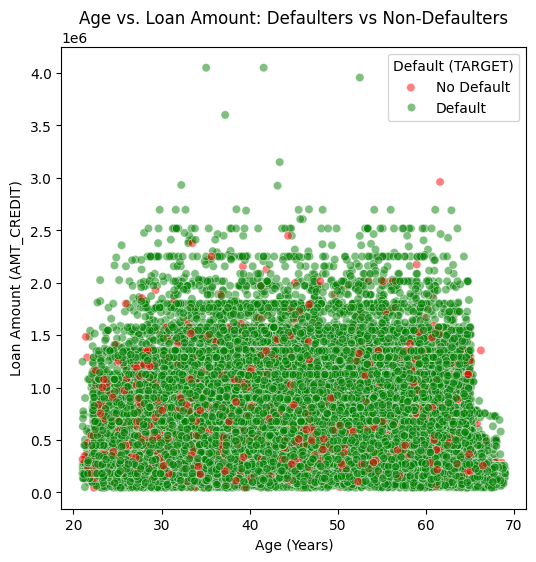

In [44]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


df['AGE_YEARS'] = (-df['DAYS_BIRTH']) / 365
plt.figure(figsize=(6, 6))
sns.scatterplot(
    data=df,
    x='AGE_YEARS',
    y='AMT_CREDIT',
    hue='TARGET',
    palette={0: 'green', 1: 'red'},
    alpha=0.5
)

plt.title('Age vs. Loan Amount: Defaulters vs Non-Defaulters')
plt.xlabel('Age (Years)')
plt.ylabel('Loan Amount (AMT_CREDIT)')
plt.legend(title='Default (TARGET)', labels=['No Default', 'Default'])
plt.show()




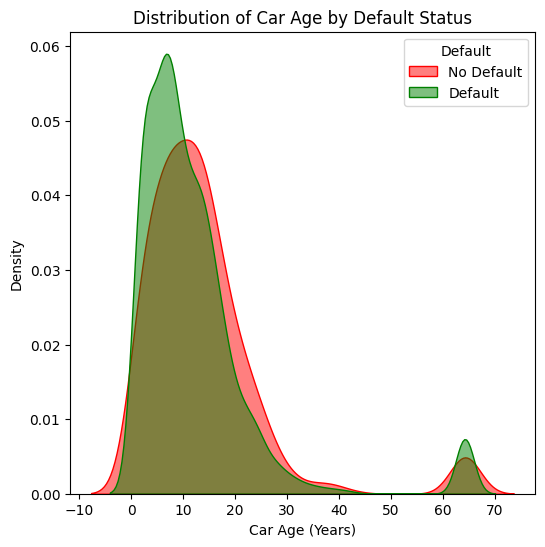

In [45]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


car_owners = df[df['OWN_CAR_AGE'].notnull() & (df['OWN_CAR_AGE'] > 0)]

plt.figure(figsize=(6, 6))
sns.kdeplot(data=car_owners, x='OWN_CAR_AGE', hue='TARGET', fill=True, common_norm=False,
            palette={0: 'green', 1: 'red'}, alpha=0.5)
plt.title('Distribution of Car Age by Default Status')
plt.xlabel('Car Age (Years)')
plt.ylabel('Density')
plt.legend(title='Default', labels=['No Default', 'Default'])

plt.show()


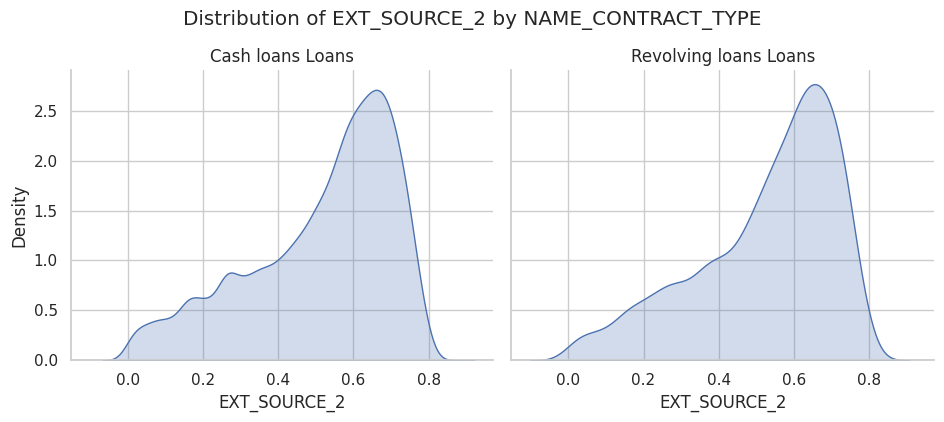

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")
g = sns.displot(
    data=df,
    x="EXT_SOURCE_2",
    col="NAME_CONTRACT_TYPE",
    kind="kde",
    fill=True,
    common_norm=False,
    height=4,
    aspect=1.2
)
g.set_titles("{col_name} Loans")
plt.suptitle("Distribution of EXT_SOURCE_2 by NAME_CONTRACT_TYPE", y=1.05)
plt.show()

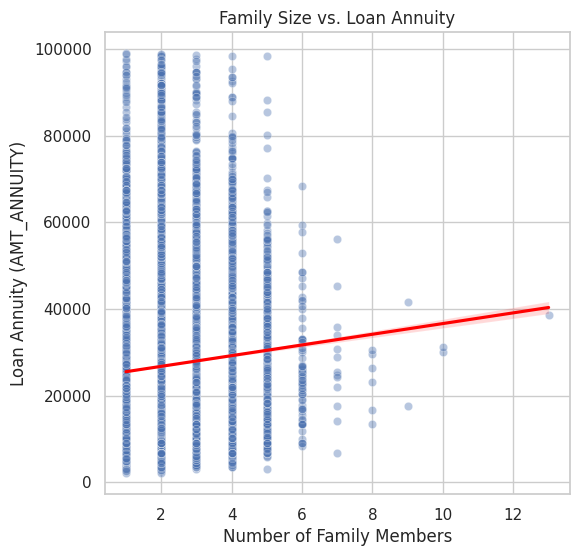

In [47]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df_filtered = df[(df['CNT_FAM_MEMBERS'] < 20) & (df['AMT_ANNUITY'] < 100000)]

plt.figure(figsize=(6, 6))
sns.scatterplot(data=df_filtered, x='CNT_FAM_MEMBERS', y='AMT_ANNUITY', alpha=0.4)
sns.regplot(data=df_filtered, x='CNT_FAM_MEMBERS', y='AMT_ANNUITY', scatter=False, color='red', line_kws={'label': 'Trend Line'})

plt.title('Family Size vs. Loan Annuity')
plt.xlabel('Number of Family Members')
plt.ylabel('Loan Annuity (AMT_ANNUITY)')
plt.show()

Text(0, 0.5, 'Loan Amount (AMT_CREDIT)')

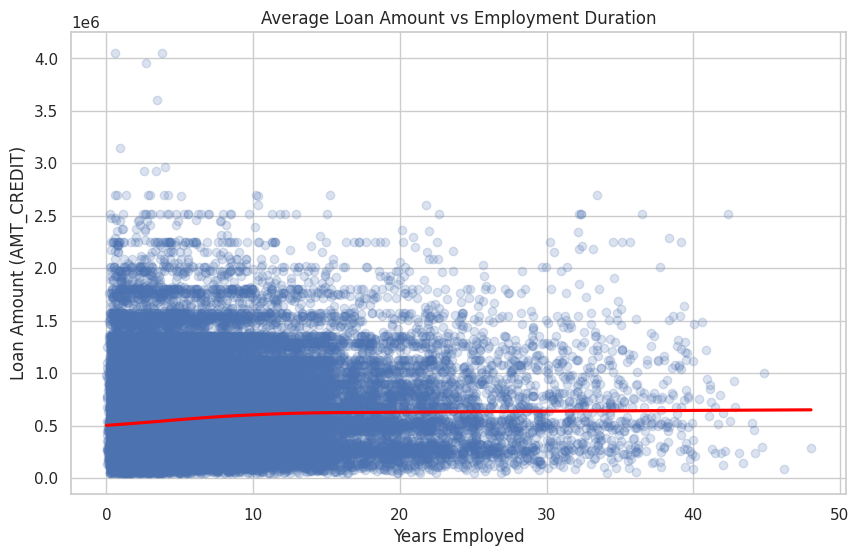

In [48]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df['YEARS_EMPLOYED'] = abs(df['DAYS_EMPLOYED']) / 365
df_filtered = df[df['YEARS_EMPLOYED'] < 60]
plt.figure(figsize=(10, 6))
sns.regplot(
    data=df_filtered,
    x="YEARS_EMPLOYED",
    y="AMT_CREDIT",
    scatter_kws={"alpha": 0.2},
    line_kws={"color": "red"},
    lowess=True
)
plt.title("Average Loan Amount vs Employment Duration")
plt.xlabel("Years Employed")
plt.ylabel("Loan Amount (AMT_CREDIT)")


/tmp/ipython-input-49-2331703159.py:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(


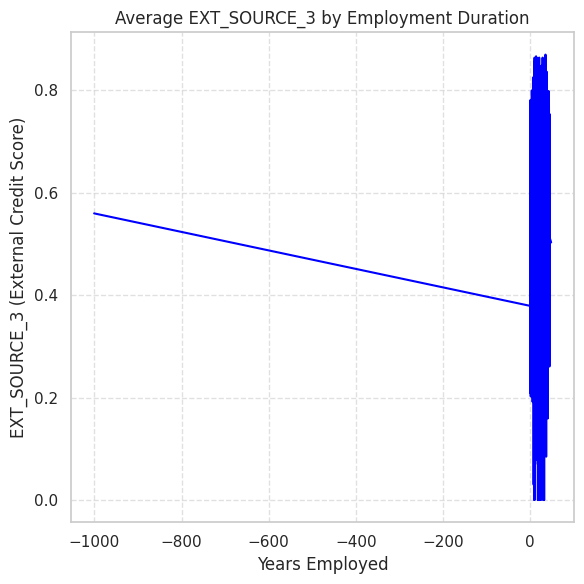

In [49]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df['YEARS_EMPLOYED'] = -df['DAYS_EMPLOYED'] / 365


df_filtered = df[(df['EXT_SOURCE_3'].notnull()) & (df['YEARS_EMPLOYED'] < 60)]


plt.figure(figsize=(6, 6))
sns.lineplot(
    data=df_filtered.sort_values('YEARS_EMPLOYED'),
    x='YEARS_EMPLOYED',
    y='EXT_SOURCE_3',
    ci=None,
    color='blue'
)

plt.title('Average EXT_SOURCE_3 by Employment Duration')
plt.xlabel('Years Employed')
plt.ylabel('EXT_SOURCE_3 (External Credit Score)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

/tmp/ipython-input-50-3169226892.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=education_default, x='NAME_EDUCATION_TYPE', y='TARGET', palette='coolwarm')


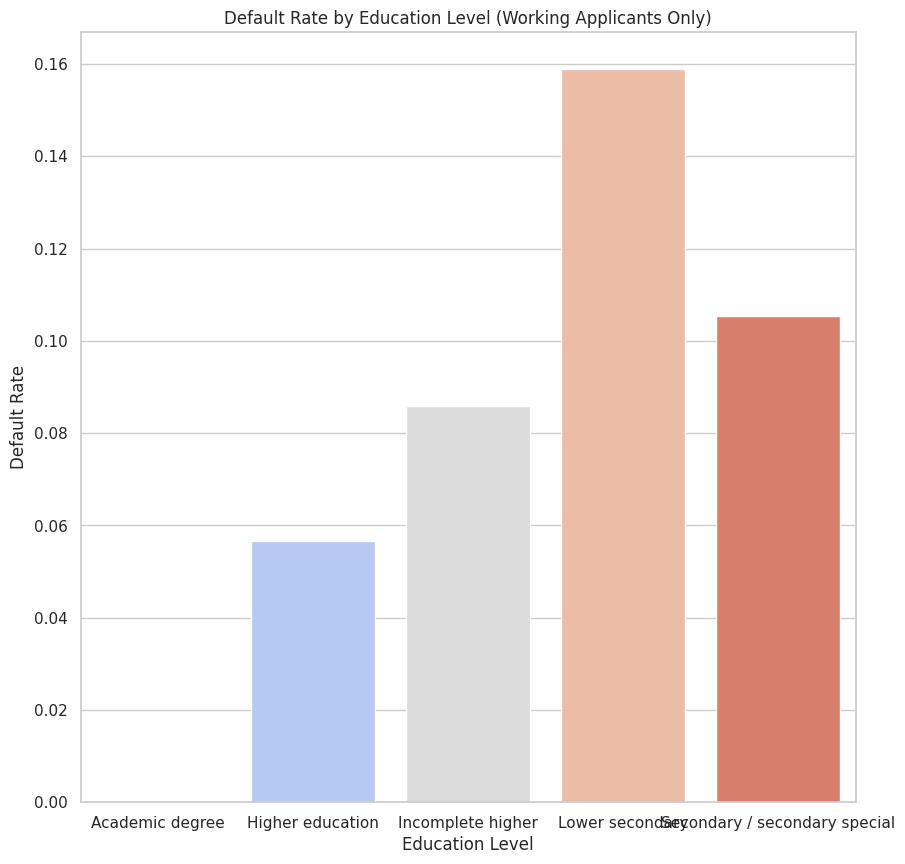

In [50]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df_working = df[df['NAME_INCOME_TYPE'] == 'Working']


education_default = df_working.groupby('NAME_EDUCATION_TYPE')['TARGET'].mean().reset_index()


plt.figure(figsize=(10, 10))
sns.barplot(data=education_default, x='NAME_EDUCATION_TYPE', y='TARGET', palette='coolwarm')
plt.title('Default Rate by Education Level (Working Applicants Only)')
plt.xlabel('Education Level')
plt.ylabel('Default Rate')
plt.show()

/tmp/ipython-input-51-3373075294.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=housing_ratios, x='NAME_HOUSING_TYPE', y='ANNUITY_INCOME_RATIO', palette='viridis')


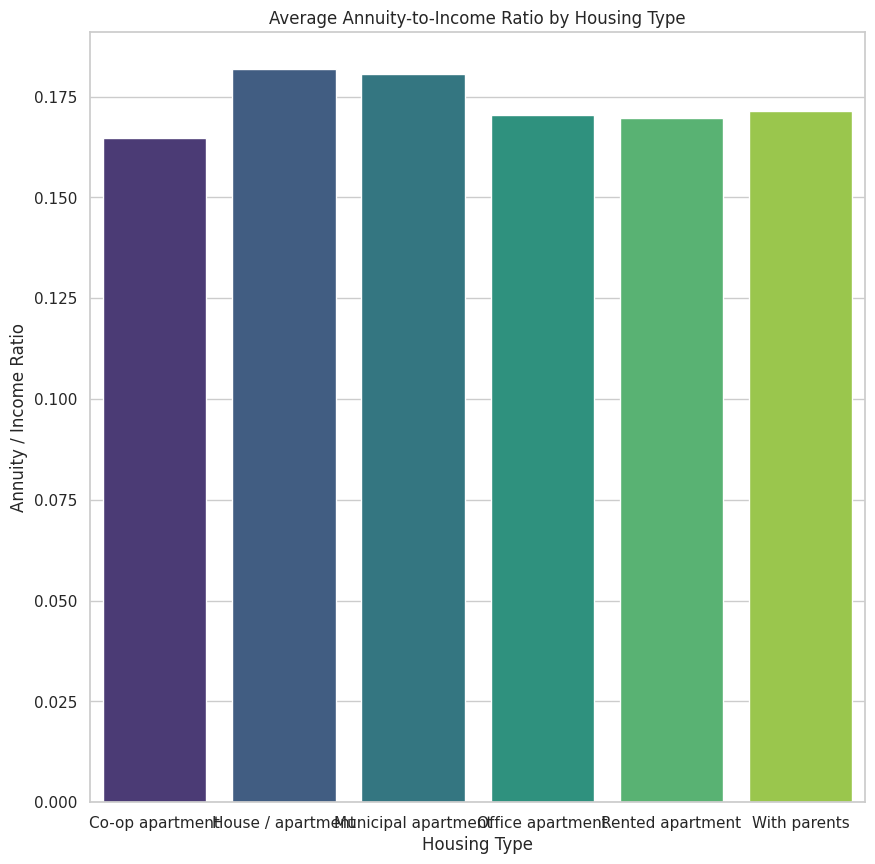

In [51]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


df['ANNUITY_INCOME_RATIO'] = df['AMT_ANNUITY'] / df['AMT_INCOME_TOTAL']

housing_ratios = df.groupby('NAME_HOUSING_TYPE')['ANNUITY_INCOME_RATIO'].mean().reset_index()


plt.figure(figsize=(10,10))
sns.barplot(data=housing_ratios, x='NAME_HOUSING_TYPE', y='ANNUITY_INCOME_RATIO', palette='viridis')

plt.title('Average Annuity-to-Income Ratio by Housing Type')
plt.xlabel('Housing Type')
plt.ylabel('Annuity / Income Ratio')
plt.show()

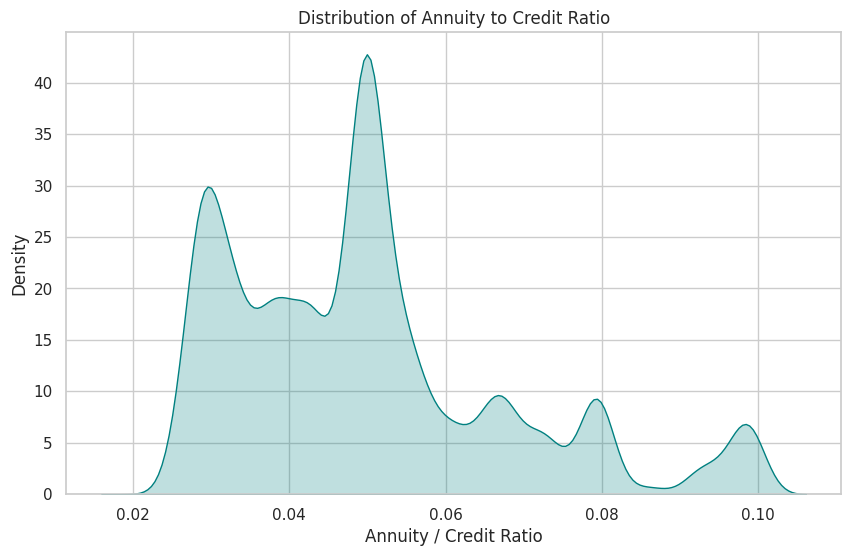

In [52]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df['ANNUITY_CREDIT_RATIO'] = df['AMT_ANNUITY'] / df['AMT_CREDIT']

df_filtered = df[df['ANNUITY_CREDIT_RATIO'] < 0.1]


plt.figure(figsize=(10, 6))
sns.kdeplot(data=df_filtered, x='ANNUITY_CREDIT_RATIO', fill=True, color='teal', bw_adjust=1)

plt.title('Distribution of Annuity to Credit Ratio')
plt.xlabel('Annuity / Credit Ratio')
plt.ylabel('Density')
plt.show()

/tmp/ipython-input-53-1942495365.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(


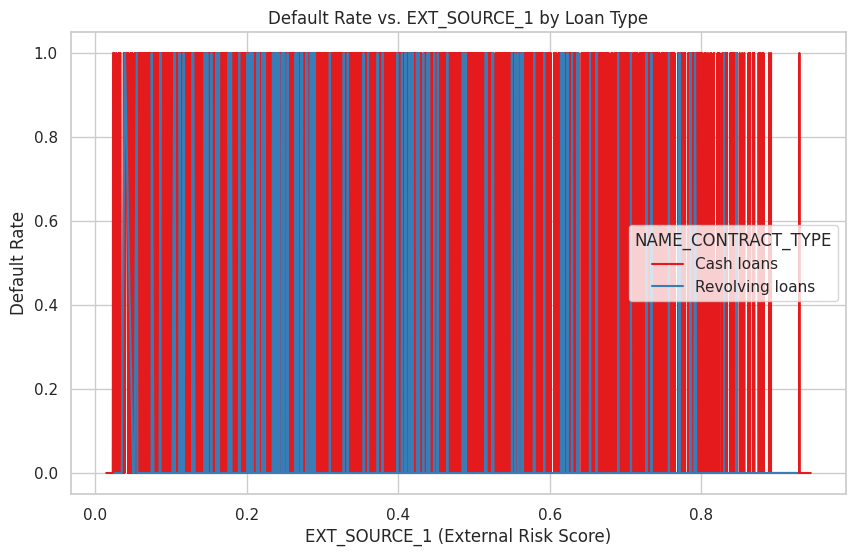

In [53]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df_filtered = df[df['EXT_SOURCE_1'].notnull()]


plt.figure(figsize=(10, 6))
sns.lineplot(
    data=df_filtered,
    x='EXT_SOURCE_1',
    y='TARGET',
    hue='NAME_CONTRACT_TYPE',
    estimator='mean',
    ci=None,
    palette='Set1'
)

plt.title('Default Rate vs. EXT_SOURCE_1 by Loan Type')
plt.xlabel('EXT_SOURCE_1 (External Risk Score)')
plt.ylabel('Default Rate')
plt.show()

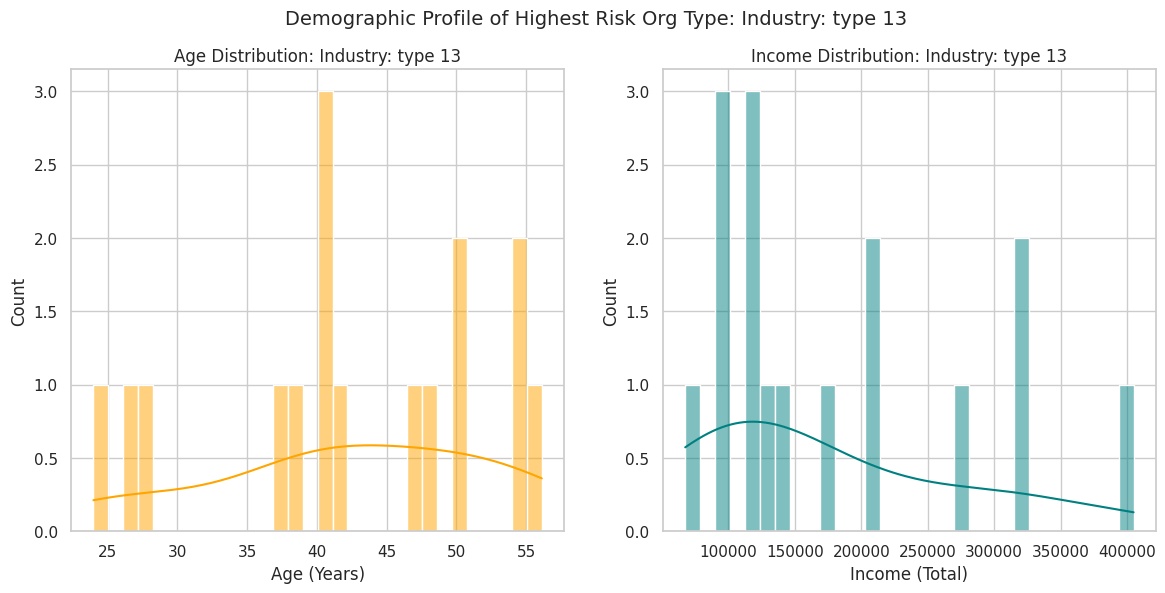

In [54]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


org_default_rate = df.groupby('ORGANIZATION_TYPE')['TARGET'].mean().sort_values()
riskiest_org = org_default_rate.idxmax()


df_risk = df[df['ORGANIZATION_TYPE'] == riskiest_org].copy()
df_risk['AGE_YEARS'] = -df_risk['DAYS_BIRTH'] / 365


fig, axes = plt.subplots(1, 2, figsize=(14, 6))


sns.histplot(df_risk['AGE_YEARS'], bins=30, kde=True, ax=axes[0], color='orange')
axes[0].set_title(f'Age Distribution: {riskiest_org}')
axes[0].set_xlabel('Age (Years)')


sns.histplot(df_risk['AMT_INCOME_TOTAL'], bins=30, kde=True, ax=axes[1], color='teal')
axes[1].set_title(f'Income Distribution: {riskiest_org}')
axes[1].set_xlabel('Income (Total)')

plt.suptitle(f'Demographic Profile of Highest Risk Org Type: {riskiest_org}', fontsize=14)
plt.show()